# Solar Data from Gridded Atmospheric Wind Integration National Dataset
---

**NREL**: National Renewable Energy Laboratory

**WIND**: Wind Integration National Dataset  
Information can be found at: https://www.nrel.gov/grid/wind-toolkit.html  
HSDS API: https://github.com/NREL/hsds-examples


The gridded atmospheric WIND toolkit is used for this analysis. It consists of a 50-TB subset containing 1-hour resolution data for 7 years on a uniform 2-km grid that covers the continental U.S., the Baja Peninsula, and parts of the Pacific and Atlantic oceans.

In [1]:
from powersimdata.input.grid import Grid
from prereise.gather.solardata.ga_wind import ga_wind
from prereise.gather.solardata.helpers import to_reise

from getpass import getpass
from matplotlib import pyplot

## 1. Solar Plants in Network

In [2]:
grid = Grid(['Western'])
solar_plant = grid.plant.groupby('type').get_group('solar')

--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


In [3]:
solar_plant.head()

,bus_id,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,GenFuelCost,GenIOB,GenIOC,GenIOD,type,interconnect,lat,lon,zone_id,zone_name
plant_id,,,,,,,,,,,,,,,,,,,,,
10441,2010760,0.00,0.0,0.0,0.0,1.0400,69.12,0,61.50,13.06,...,0.0,0.0,0.0,0,solar,Western,45.584722,-122.405600,201,Washington
10447,2010776,0.00,0.0,0.0,0.0,1.0318,32.07,0,28.00,3.77,...,0.0,0.0,0.0,0,solar,Western,48.448100,-122.433100,201,Washington
10448,2010776,14.32,0.0,0.0,0.0,1.0318,23.98,1,14.32,14.32,...,0.0,0.0,0.0,0,solar,Western,48.448100,-122.433100,201,Washington
10451,2010782,13.43,0.0,0.0,0.0,1.0156,27.32,1,13.43,13.43,...,0.0,0.0,0.0,0,solar,Western,46.103887,-122.918429,201,Washington
10452,2010782,14.65,0.0,0.0,0.0,1.0156,18.63,1,14.65,14.65,...,0.0,0.0,0.0,0,solar,Western,46.103887,-122.918429,201,Washington


In [4]:
print("There are %d solar plants in the Western interconnection." % len(solar_plant))

There are 391 solar plants in the Western interconnection.


## 2. Downloading Data
Get an API key at the following URL: https://developer.nrel.gov/signup/.

In [5]:
key = getpass(prompt='api_key=')
data = ga_wind.retrieve_data(solar_plant, key, start_date='2012-06-01', end_date='2012-07-01')

api_key=········


100%|██████████| 150/150 [01:03<00:00,  2.24it/s]


In [6]:
data.tail(n=20)

,Pout,plant_id,ts,ts_id
281500,8.516960,12303,2012-06-30 23:00:00,720
281501,5.352483,12376,2012-06-30 23:00:00,720
281502,3.179693,12377,2012-06-30 23:00:00,720
281503,2.649744,12378,2012-06-30 23:00:00,720
281504,1.987308,12379,2012-06-30 23:00:00,720
281505,30.535263,12399,2012-06-30 23:00:00,720
281506,4.679734,12400,2012-06-30 23:00:00,720
281507,17.899982,12401,2012-06-30 23:00:00,720
281508,6.760794,12512,2012-06-30 23:00:00,720
281509,5.683853,12513,2012-06-30 23:00:00,720


## 3. Plot Data
One solar plant is selected. The power output (in MW) is then plotted for the entire year for 72-h in June.

In [7]:
data_oneplant = data[data.plant_id == 12400]

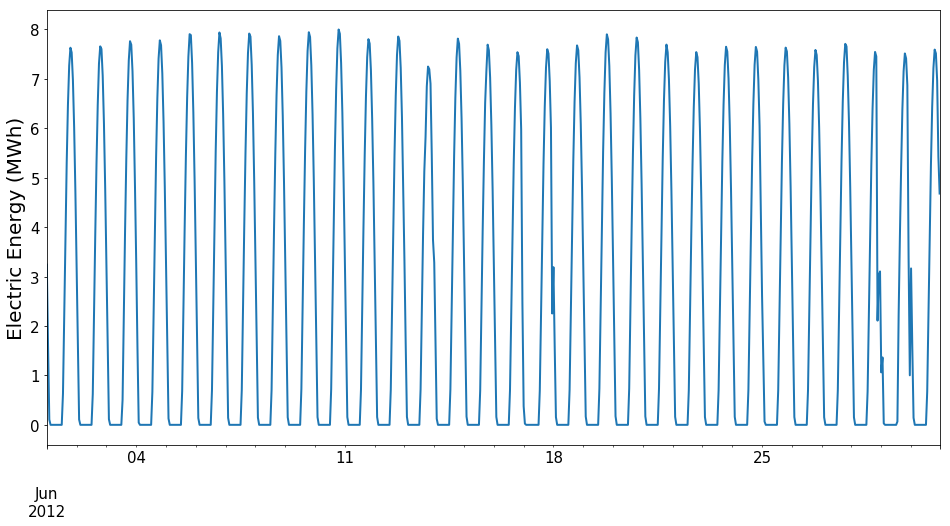

In [8]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant.plot(x='ts', y='Pout', ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

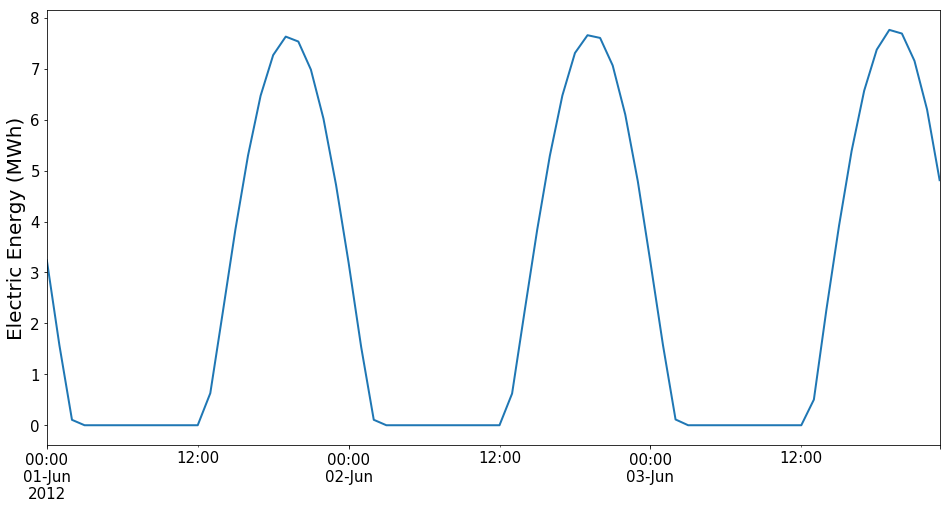

In [9]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant[:72].plot(x='ts', y='Pout', ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

## 4. Format Data
Data are formated for REISE.

In [10]:
data_reise = to_reise(data)

In [11]:
data_reise.tail()

,10441,10447,10448,10451,10452,10453,10454,10455,10456,10457,...,12514,12515,12516,12675,12676,12677,12678,12753,12754,12874
UTC,,,,,,,,,,,,,,,,,,,,,
2012-06-30 19:00:00,53.997040,19.023674,13.588338,1.896136,1.896136,1.896136,29.042639,42.900551,29.042639,29.042639,...,29.273003,34.151836,9.269784,41.336628,8.813780,8.813780,41.336628,17.367571,15.341353,9.959949
2012-06-30 20:00:00,36.581623,23.281616,16.629726,13.874701,13.874701,13.874701,31.984087,47.245533,31.984087,31.984087,...,28.777611,33.573875,9.112909,40.062599,8.542131,8.542131,40.062599,17.548264,15.500967,9.776792
2012-06-30 21:00:00,58.587799,24.477966,17.484262,4.004198,4.004198,4.004198,33.621712,49.664562,33.621712,33.621712,...,26.443899,30.851213,8.373900,38.206688,8.146416,8.146416,38.206688,16.753683,14.799086,3.774006
2012-06-30 22:00:00,53.719692,24.644854,17.603466,15.918582,15.918582,15.918582,34.105770,50.379597,34.105770,34.105770,...,22.712357,26.497749,7.192246,32.620392,6.955307,6.955307,32.620392,15.071014,13.312730,4.384385
2012-06-30 23:00:00,41.006264,5.169447,3.692462,14.322676,14.322676,14.322676,30.998848,45.790180,30.998848,30.998848,...,17.949011,20.940512,5.683853,28.228428,6.018854,6.018854,28.228428,12.574040,11.107069,5.755436
